In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

2023-10-22 07:24:13.127761: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 07:24:13.127814: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 07:24:13.127846: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-22 07:24:13.134969: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 07:24:15.101972: I tensorflow/compiler/

In [16]:
!pip install easyocr

  Obtaining dependency information for easyocr from https://files.pythonhosted.org/packages/cb/0e/09bafec31db720e796d3f5b0814c37c5fdb59dcd35a2c6c6b1c774b09646/easyocr-1.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5b/13/fcabc86948f9e89b62a538670720f8589d63f93d3f4f3d172236a98e70f8/torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for torchvision>=0.5 from https://files.pythonhosted.org/packages/08/aa/033a0a1bca4a3b8f81f97709024e053da37cf5c970f3dc5d76233c920b99/torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for Shapely from https://files.pythonhosted.org/packages/8c/47/05c8bb8322861113e72b903aebaaa4678ae6e44c886c189ad8fe297f2008/shapely-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pyclipper from https://files.pythonhosted.org/packages/43/64/9c8e0c7d96d32c63e3

In [17]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mob
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_input_inc
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import cv2
import numpy as np
import easyocr

In [9]:
model = load_model("mobile_net_v2.model")

In [47]:
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    print(coords, denorm)
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin-2,ymin-2)
    pt2 =(xmax+4,ymax+4)
    crop_img = image[ymin:ymax, xmin:xmax]
    # print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, crop_img, coords

1/1 [==============================] - 0s 18ms/step
[[0.26072106 0.35368273 0.6236331  0.69869226]] [599 599 400 400]


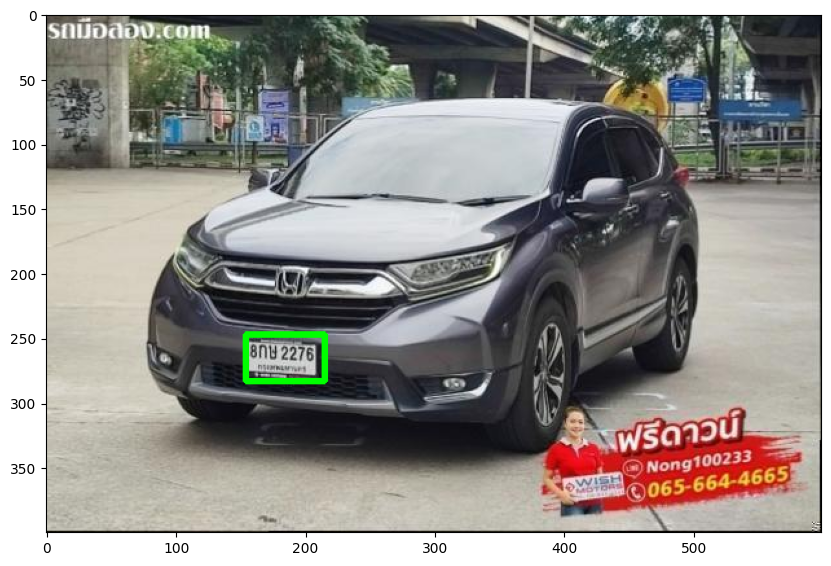

In [49]:
path = './dataset/images/294707ec-1697729862.012733.jpg'
image, plate, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [46]:
reader = easyocr.Reader(['th'], gpu=False) # this needs to run only once to load the model into memory
result = reader.readtext(plate)
print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[0, 2], [55, 2], [55, 22], [0, 22]], '8ก02276', 0.09657993151788632)]


In [50]:
!pip freeze > requirements.txt